###Softmax


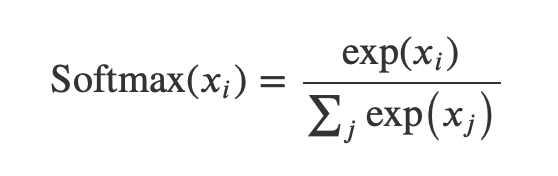

In [ ]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
      result.append((i/sumExpL).round(2))
    return result

print(softmax([2, 1, 0]))

[0.67, 0.24, 0.09]


Cross Entropy

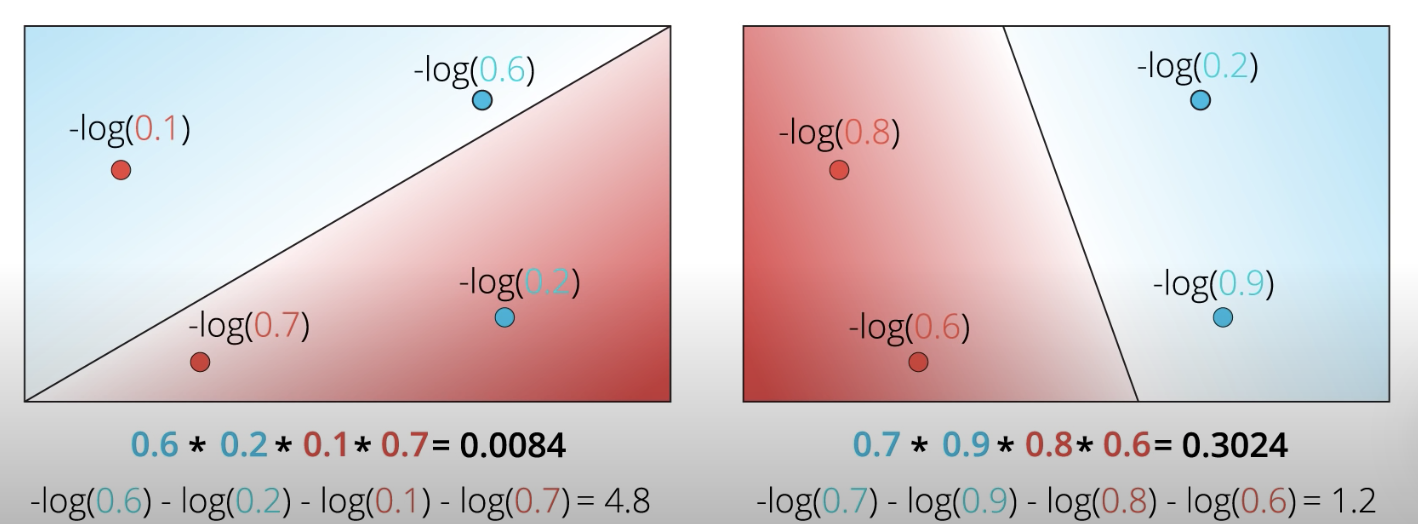

In [ ]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y*np.log(P) + (1 - Y)*np.log(1 -P)).round(1)

P = [[0.6, 0.2, 0.9, 0.3],[0.7, 0.9, 0.2, 0.4]] 
Y = [[1, 1, 0, 0],[1, 1, 0, 0]]

for p, y in zip(P, Y):
  print(cross_entropy(y, p))

4.8
1.2


###Implementing the Gradient Descent Algorithm

In [ ]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-neural-networks/gradient-descent/data.csv

--2020-08-04 04:26:13--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-neural-networks/gradient-descent/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1778 (1.7K) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.74K  --.-KB/s    in 0s      

2020-08-04 04:26:14 (37.1 MB/s) - ‘data.csv.1’ saved [1778/1778]



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

###Reading and plotting the data

         0         1  2
0  0.78051 -0.063669  1
1  0.28774  0.291390  1
2  0.40714  0.178780  1
3  0.29230  0.421700  1
4  0.50922  0.352560  1


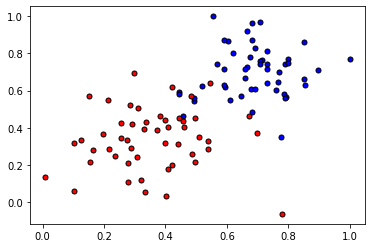

In [ ]:
data = pd.read_csv('data.csv', header=None)
print(data.head())
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.

Sigmoid activation function
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
Output (prediction) formula
$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$
Error function
$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$
The function that updates the weights
$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:

# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1- y)* np.log(1 - output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
  output = output_formula(x, weights, bias)
  d_error = y - output
  weights += learnrate * d_error * x
  bias += learnrate * d_error

  return weights, bias
    

###Training function

In [ ]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

###Training


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


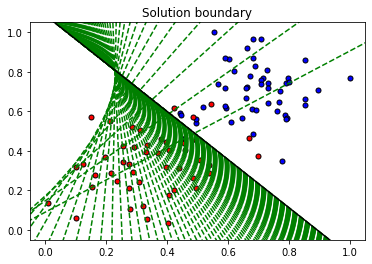

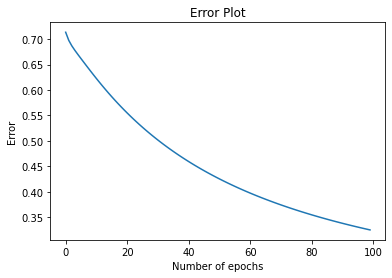

In [ ]:
train(X, y, epochs, learnrate, True)